In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

In [180]:
# Pull in dictionaries from other notebooks
%store -r boa_dict
%store -r wells_dict
%store -r chase_dict
%store -r USB_dict
%store -r LD_dict
%store -r cal_dict
%store -r fair_dict

In [146]:
chase_dict

{'Certainty of Prediction': 0.983321153763487,
 'Black applicant error rate': 0.19230769230769232,
 'Asian applicant error rate': 0.08853474988933155,
 'biracial': 0.20815986677768525,
 'unspecified': -0.08326394671107411,
 'Female applicant error rate': 0.006322311437061395,
 'Hispanic applicant error rate': -0.08356775149886014,
 'Lender': 'JPMorgan Chase'}

* Notes to include: 
    * Certain protected classes are not yet represented in the model because there is not enough data to confidently determine error rates. Additionally, it is unclear as to how the data was determined for certain categories. For example, derived sex: joint. Looking at the raw data, there are several applicants (though very few) that chose both male and female on the application. However, there are a much larger number of these applicants in the derived column. In a nutshell, the numbers don't line up. need to check to see if sex was visually observed for many of those values. 
    * Pacific Islanders, native americans, were not compared because there were so few applicants
    * Rather than show the threshold value, maybe "curve" the likelihood of approval so it's more easily interpretable. An 89% probability of approval might sound good, but if the threshold is 81%, that's cutting it a little close. How to curve? Proportion?
* Model inputs are different shapes. Ideas to address: 
    * Wrap model preparation in a function for each bank
    * pull record from DF instead of X_test
    * Run record through model preparation function
    * pass into predict
    * This should help with the User Input issue also

In [147]:
pred_dict = {
  "Bank of America": 53.65, 
  "Caliber Home Loans": 96.12, 
  "Fairway Independent Mortgage": 96.47, 
  "JPMorgan Chase": 85.36, 
  "Loan Depot": 90.61, 
  "U.S. Bank": 87.14, 
  "Wells Fargo": 94.55
}
dicts = [boa_dict, wells_dict, chase_dict, USB_dict, LD_dict, cal_dict, fair_dict]
bank_performance = pd.DataFrame(dicts, columns=['Lender', 'Likelihood of Approval', 'Certainty of Prediction', 
                                         'Approval Threshold', 'Black applicant error rate', 
                                         'Asian applicant error rate', 'Hispanic applicant error rate', 
                                         'Female applicant error rate', 'Fossil Fuel Funding', 'Climate Policy Score'])

In [148]:
chase_dict['Lender'] = 'JPMorgan Chase'
chase_dict

{'Certainty of Prediction': 0.983321153763487,
 'Black applicant error rate': 0.19230769230769232,
 'Asian applicant error rate': 0.08853474988933155,
 'biracial': 0.20815986677768525,
 'unspecified': -0.08326394671107411,
 'Female applicant error rate': 0.006322311437061395,
 'Hispanic applicant error rate': -0.08356775149886014,
 'Lender': 'JPMorgan Chase'}

In [149]:
for k, v in pred_dict.items(): 
    idx  = bank_performance.index[bank_performance['Lender'] == k]
    bank_performance.at[idx, 'Likelihood of Approval'] = v

In [150]:
bank_performance

,Lender,Likelihood of Approval,Certainty of Prediction,Approval Threshold,Black applicant error rate,Asian applicant error rate,Hispanic applicant error rate,Female applicant error rate,Fossil Fuel Funding,Climate Policy Score
0,Bank of America,53.65,0.942492,NaN,1.204819,0.322373,2.629268,-0.493992,NaN,NaN
1,Wells Fargo,94.55,0.983665,NaN,0.236646,0.000000,0.229462,0.000000,NaN,NaN
2,JPMorgan Chase,85.36,0.983321,NaN,0.192308,0.088535,-0.083568,0.006322,NaN,NaN
3,U.S. Bank,87.14,0.917965,NaN,3.409091,1.670644,2.561713,-0.307062,NaN,NaN
4,Loan Depot,90.61,0.953630,NaN,0.114548,0.184162,-0.042698,-0.199402,NaN,NaN
5,Caliber Home Loans,96.12,0.969767,NaN,0.111483,0.000000,-0.195374,0.000000,NaN,NaN
6,Fairway Independent Mortgage,96.47,0.976179,NaN,0.000000,0.000000,-0.027225,0.000000,NaN,NaN


In [154]:
# load models
boa = pickle.load(open('boa_model.pkl', 'rb'))
wells = pickle.load(open('wells_model2.pkl', 'rb'))
chase = pickle.load(open('chase_model.pkl', 'rb'))
USB = pickle.load(open('usb_model.pkl', 'rb'))
LD = pickle.load(open('LD_model.pkl', 'rb'))
fair = pickle.load(open('fair_model.pkl', 'rb'))
cal = pickle.load(open('cal_model.pkl', 'rb'))

In [156]:
X_user = [250000, 92, 360, 90, 26, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [181]:
# predict on the new data
model_lst = [boa, wells, chase, USB, LD, fair, cal]
bank_lst = ['Bank of America', 'Wells Fargo', 'JPMorgan Chase', 'U.S. Bank', 'Loan Depot', 
           'Fairway Independent Mortgage', 'Caliber Home Loans']
prob_dict = {}
for model, bank in zip(model_lst, bank_lst):
    y_pred = model.predict_proba(np.array(X_user).reshape(1,-1))[:,1][0]

    prob_dict[bank] = y_pred

# Create a dataframe of all static bank qualities
dicts = [boa_dict, wells_dict, chase_dict, USB_dict, LD_dict, cal_dict, fair_dict]
bank_performance = pd.DataFrame(dicts, columns=['Lender', 'Likelihood of Approval', 'Certainty of Prediction', 
                                     'Approval Threshold', 'Black applicant error rate', 
                                     'Asian applicant error rate', 'Hispanic applicant error rate', 
                                     'Female applicant error rate', 'Fossil Fuel Funding', 'Climate Policy Score'])
# Add in predictions
for k, v in prob_dict.items(): 
    idx  = bank_performance.index[bank_performance['Lender'] == k]
    bank_performance.at[idx, 'Likelihood of Approval'] = v



In [182]:
bank_performance.set_index('Lender').applymap(lambda x: round(x*100,2))

,Likelihood of Approval,Certainty of Prediction,Approval Threshold,Black applicant error rate,Asian applicant error rate,Hispanic applicant error rate,Female applicant error rate,Fossil Fuel Funding,Climate Policy Score
Lender,,,,,,,,,
Bank of America,94.93,94.25,NaN,1.20,0.32,2.63,-0.49,NaN,NaN
Wells Fargo,99.07,98.37,NaN,0.24,0.00,0.23,0.00,NaN,NaN
JPMorgan Chase,99.01,98.33,NaN,0.19,0.09,-0.08,0.01,NaN,NaN
U.S. Bank,86.56,91.80,NaN,3.41,1.67,2.56,-0.31,NaN,NaN
Loan Depot,97.32,95.36,NaN,11.45,18.42,-0.04,-0.20,NaN,NaN
Caliber Home Loans,95.89,96.98,NaN,0.11,0.00,-0.20,0.00,NaN,NaN
Fairway Independent Mortgage,97.79,97.62,NaN,0.00,0.00,-0.03,0.00,NaN,NaN


In [ ]:
boa_preds = 

In [163]:
fig, ax = plt.subplots()
ax.hist(sgd_probs*100, color='tab:blue')
ax.axvline(70, label='Approval Threshold')
ax.axvline(85, label='Applicant Score', color='dimgray', linestyle='dashed')
ax.set_title('Loan Depot')
ax.get_yaxis().set_visible(False)
ax.set_xlabel('Approval Percentage')
plt.legend()
plt.savefig('Threshold example loan dept');

{'Lender': 'Caliber Home Loans',
 'Certainty of Prediction': 0.9697665832547073,
 'Black applicant error rate': 0.11148272017837235,
 'Asian applicant error rate': 0.0,
 'biracial': 0.07047216349541931,
 'unspecified': -0.07047216349541931,
 'Female applicant error rate': 0.0,
 'Hispanic applicant error rate': -0.19537381247418423}

# Compatability Issues
* Because I wanted to first optimize each model, each dataframe that is passed in is potentially a different shape. I wanted to use the same thresholds for making decisions regarding missing values, so some columns were dropped for some banks, others for other banks. This is definitely an issue that needs to be addressed. However, to get a MVP web app, I'm going to pull example records (from the same index) from each model dataset and predict manually, for now. - this won't work because it is not the same applicant across all datasets. 
* I'm going to take one sample from one dataset, prior to any data restructuring. 
    * Then, I'll create a one-row dataframe of that sample, and pass it through the preprocessing steps for each bank.
    * Then, I'll store the resulting dataframe as an array for each bank, and use it to predict probabilities. 

In [69]:
loaded_model_wells.predict_proba(example.reshape(1,-1))[:,1]

array([1.])

In [ ]:
# User input example

def user_input(): 
    user_arr = []
    home_address = input('Property address: ')
    conforming = input('Is this a conforming loan? ')
    prop_val = input('Estimated home price: ')
    loan_amount = input('Estimated loan amount: ')
    loan_term = input('Length of loan in years: ')
    
    user_arr.append(prop_val)
    

In [22]:
# User info for web app demo (used row 42 in each )

In [77]:
%store -r JP_features
%store -r wells_features
%store -r features



In [79]:
print(len(JP_features))
print(len(wells_features))
print(len(features))

44
46
44


In [76]:
cal_features

,features,coefs
0,features,0.217958
1,coefs,-0.129080


In [74]:
for i in JP_features.features.values: 
    if i not in wells_features.features.values:
        print(i)

intro_rate_period
negative_amortization
balloon_payment
other_nonamortizing_features


In [80]:
wells_features.sort_values(by='coefs', ascending = True)

,features,coefs
44,aus-1_5,-9.094887
35,loan_type_2,-2.834129
43,aus-1_4,-0.784109
4,debt_to_income_ratio,-0.563385
37,loan_type_4,-0.422907
25,derived_race_Black or African American,-0.058048
16,conforming_loan_limit_C,-0.052168
24,derived_race_Asian,0.000000
26,derived_race_Free Form Text Only,0.000000
27,derived_race_Joint,0.000000


# Creating a graphing function

In [218]:
# load models
boa_preds = pickle.load(open('boa_preds.pkl', 'rb'))
wells_preds = pickle.load(open('wells_preds.pkl', 'rb'))
chase_preds = pickle.load(open('chase_preds.pkl', 'rb'))
USB_preds = pickle.load(open('usb_preds.pkl', 'rb'))
LD_preds = pickle.load(open('LD_preds.pkl', 'rb'))
fair_preds = pickle.load(open('fair_preds.pkl', 'rb'))
cal_preds = pickle.load(open('cal_preds.pkl', 'rb'))

with open('boa_model.pkl', 'rb') as f:
    boa = pickle.load(f)

with open('wells_model2.pkl', 'rb') as f:
    wells = pickle.load(f)

with open('chase_model.pkl', 'rb') as f:
    chase = pickle.load(f)

with open('USB_model.pkl', 'rb') as f:
    USB = pickle.load(f)

with open('LD_model.pkl', 'rb') as f:
    LD = pickle.load(f)

with open('fair_model.pkl', 'rb') as f:
    fair = pickle.load(f)

In [198]:
boa_dict['threshold'] = 0.75
y_pred = boa.predict_proba(np.array(X_user).reshape(1,-1))[:,1][0]

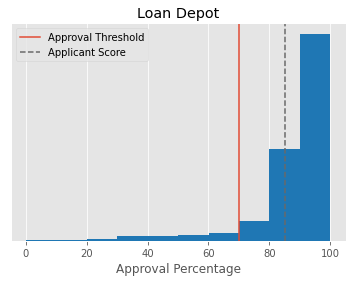

In [220]:
fig, ax = plt.subplots()
ax.hist(boa_preds*100, color='tab:blue')
ax.axvline(70, label='Approval Threshold')
ax.axvline(85, label='Applicant Score', color='dimgray', linestyle='dashed')
ax.set_title('Loan Depot')
ax.get_yaxis().set_visible(False)
ax.set_xlabel('Approval Percentage')
plt.legend()
plt.savefig('Threshold example loan dept');

TypeError: '>' not supported between instances of 'float' and 'StandardScaler'

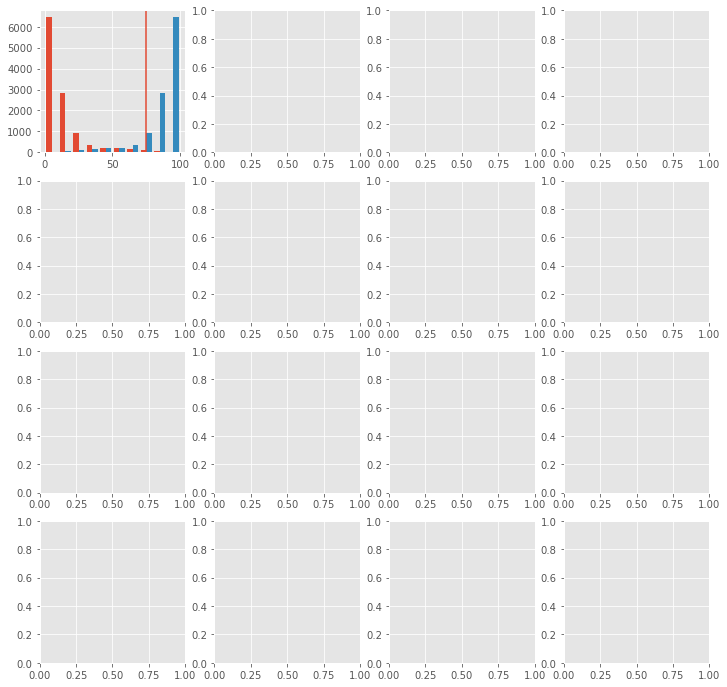

In [204]:
fig, ax = plt.subplots(4,4, figsize=(12,12))
ax[0,0].hist(boa_preds*100)
ax[0,0].axvline(75, label='Approval Threshold')
ax[0,0].axvline(boa, label='Applicant Score', color='dimgray', linestyle='dashed')
ax[0,0].set_title('Loan Depot')
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].set_xlabel('Approval Percentage')
plt.legend();
